
## Housing Price - 2 
- Compare several machine learning models on a performance metric
- Perform hyperparameter tuning on the best model to optimize it for the problem
- Evaluate the best model on the testing set

### Imports 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Read in Data

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (1166, 143)
Testing Feature Size:   (292, 143)
Training Labels Size:   (1166, 1)
Testing Labels Size:    (292, 1)


In [3]:
train_features.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,log_BsmtUnfSF,...,MSSubClass_75,MSSubClass_80,MSSubClass_85,MasVnrType_BrkCmn,MasVnrType_Stone,LotShape_IR1,LotShape_IR2,LotShape_IR3,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,255,70.0,8400,5,6,1957,1957,0.0,922.0,0.0,392.0,1314.0,1314,0,0,0.0,3,1,0,294.0,250,0,0,0,0,0,0,6,2010,5.971262,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1067,59.0,7837,6,7,1993,1994,0.0,0.0,0.0,799.0,799.0,799,772,0,0.0,3,1,1,380.0,0,40,0,0,0,0,0,5,2009,6.683361,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,866,NaN,8750,5,6,1970,1970,76.0,828.0,0.0,174.0,1002.0,1002,0,0,0.0,3,1,0,902.0,0,0,0,0,0,0,0,8,2009,5.159056,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,800,60.0,7200,5,7,1937,1950,252.0,569.0,0.0,162.0,731.0,981,787,0,0.0,3,1,2,240.0,0,0,264,0,0,0,0,6,2007,5.087597,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,381,50.0,5000,5,6,1924,1950,0.0,218.0,0.0,808.0,1026.0,1026,665,0,0.0,3,1,1,308.0,0,0,242,0,0,0,0,5,2010,6.694562,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


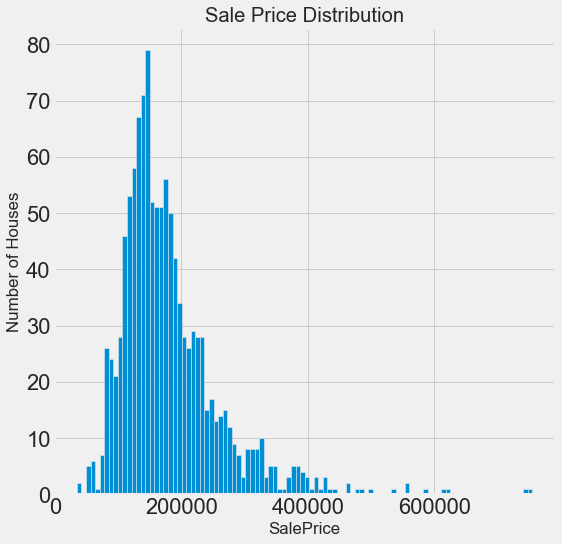

In [4]:
figsize(8, 8)

# Histogram of the Sale Price
plt.style.use('fivethirtyeight')
plt.hist(train_labels['SalePrice'].dropna(), bins = 100);
plt.xlabel('SalePrice'); plt.ylabel('Number of Houses'); 
plt.title('Sale Price Distribution');

# Evaluating and Comparing Machine Learning Models

## Imputing Missing Values

In [5]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [6]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [7]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


### Scaling Features

In [8]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [9]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

## Models to Evaluate

-  Linear Regression
-  Support Vector Machine Regression
-  Random Forest Regression
-  Gradient Boosting Regression
-  K-Nearest Neighbors Regression

In [10]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [11]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 20302.4658


In [12]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 39984.3100


In [13]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 20081.5969


In [14]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 17484.6571


In [15]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 25183.1336


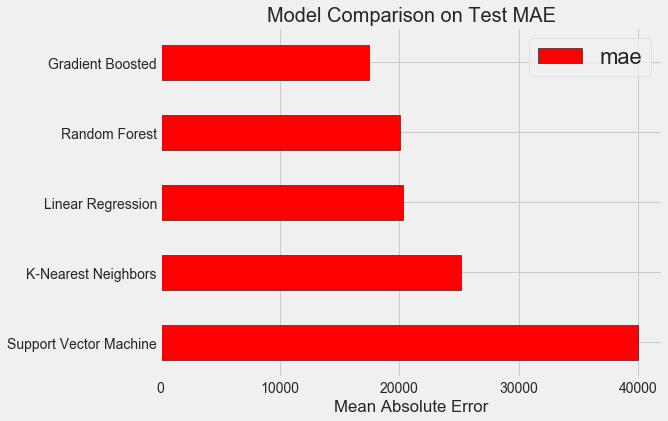

In [16]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

## Model Optimization

### Hyperparameter Tuning with Random Search and Cross Validatio

In [17]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

The following parameters will be passed in the Randomized Search Object:

    estimator: the model
    param_distributions: the distribution of parameters we defined
    cv the number of folds to use for k-fold cross validation
    n_iter: the number of different combinations to try
    scoring: which metric to use when evaluating candidates
    n_jobs: number of cores to run in parallel (-1 will use all available)
    verbose: how much information to display (1 displays a limited amount)
    return_train_score: return the training score for each cross-validation fold
    random_state: fixes the random number generator 

The Randomized Search Object is trained the same way as any other scikit-learn model. After training, we can compare all the different hyperparameter combinations and find the best performing one. 

In [18]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [19]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.1min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [20]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
9,4.280844,0.072312,0.005250,4.330157e-04,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-15776.200409,-17204.797150,-17794.681482,-14919.273778,-16423.852717,1136.542602,1,-4016.053550,-3923.161021,-3626.176887,-4069.716913,-3908.777093,171.376514
13,6.831389,0.029871,0.019751,1.299047e-03,1500,10,1,sqrt,5,lad,"{'n_estimators': 1500, 'min_samples_split': 10...",-17246.298958,-15787.540655,-16900.195606,-16134.608182,-16517.160437,582.746197,2,-3091.064814,-2940.196636,-3112.762078,-3126.990414,-3067.753485,74.747834
7,3.269237,0.467534,0.005000,1.192093e-07,500,4,6,auto,3,ls,"{'n_estimators': 500, 'min_samples_split': 4, ...",-15640.030774,-17730.729474,-17330.154329,-15442.713751,-16536.163468,1007.073541,3,-4354.744155,-3908.330673,-3874.311372,-4247.280466,-4096.166667,208.686266
21,3.081725,0.100093,0.008001,0.000000e+00,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-17328.201132,-15908.420811,-17966.809174,-15873.624816,-16769.005059,906.603080,4,-3179.316337,-2763.342359,-2685.019236,-3010.347168,-2909.506275,196.675288
16,9.811154,0.306834,0.013251,4.329813e-04,1500,4,6,None,3,ls,"{'n_estimators': 1500, 'min_samples_split': 4,...",-15972.014665,-17965.122542,-17627.656428,-15556.865958,-16780.737632,1033.399994,5,-923.297498,-752.794314,-819.685144,-854.535680,-837.578159,61.530121
12,7.210558,0.571102,0.010900,3.539658e-03,500,6,6,None,5,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-16922.298988,-17489.875472,-17476.656009,-15777.551508,-16917.092050,695.983259,6,-5088.832636,-4552.084877,-4698.160664,-4710.000933,-4762.269777,198.534004
19,8.244120,0.664143,0.009000,1.192093e-07,1100,6,2,auto,3,lad,"{'n_estimators': 1100, 'min_samples_split': 6,...",-16451.059067,-17445.632413,-17442.036075,-16569.707528,-16977.059434,468.660747,7,-6322.315324,-6598.090240,-5927.663066,-6448.712801,-6324.195358,248.879686
5,3.877569,0.304136,0.018901,1.579739e-02,900,6,8,log2,5,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-16893.578458,-16696.171980,-18418.353528,-16089.724205,-17024.063249,856.877391,8,-6117.329323,-5654.329704,-6028.430652,-5685.810274,-5871.474988,204.146329
11,20.274052,0.608300,0.038752,1.479064e-03,1500,2,4,log2,10,lad,"{'n_estimators': 1500, 'min_samples_split': 2,...",-17313.446564,-16560.374184,-18934.532002,-16552.253557,-17339.459911,970.465784,9,-1528.344327,-1415.715213,-1453.637548,-1400.616695,-1449.578446,49.407772
1,1.467584,0.012895,0.003500,5.002022e-04,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-17626.011877,-16717.126332,-18889.202435,-16217.317559,-17362.087200,1015.233252,10,-5160.114662,-5068.711195,-4984.410723,-5292.120198,-5126.339195,114.114855


In [21]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 3,
                                  min_samples_leaf = 2,
                                  min_samples_split = 4,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [23]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.0min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

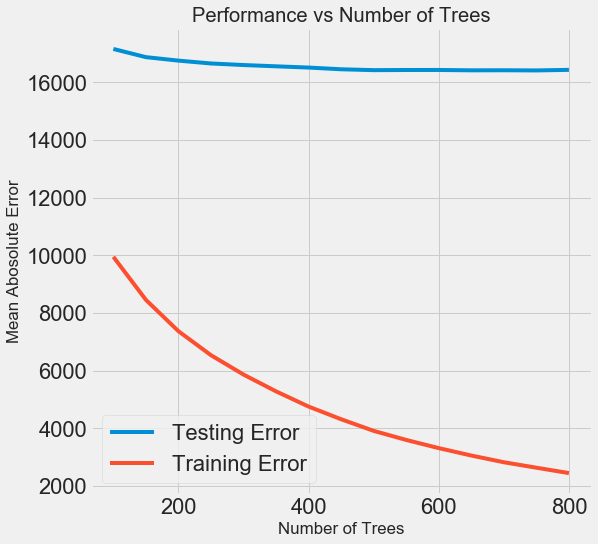

In [24]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [25]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
13,6.960646,0.570585,0.00700,1.192093e-07,750,{'n_estimators': 750},-15708.001837,-17186.727517,-17844.050145,-14919.157411,-16414.540626,1158.628104,1,-2703.708004,-2614.418833,-2422.314609,-2782.804819,-2630.811566,134.308919
11,6.160148,0.571328,0.00865,4.033210e-03,650,{'n_estimators': 650},-15741.472237,-17184.704526,-17845.671875,-14900.192509,-16418.087608,1159.941579,2,-3135.209907,-3013.143703,-2849.040696,-3215.378419,-3053.193181,138.124032
12,6.478265,0.114540,0.00675,4.329814e-04,700,{'n_estimators': 700},-15712.594686,-17187.727798,-17851.566294,-14928.974579,-16420.267203,1157.249717,3,-2874.862721,-2797.823445,-2644.307087,-2962.726288,-2819.929885,116.983430
8,4.416550,0.016384,0.00500,1.032383e-07,500,{'n_estimators': 500},-15776.200409,-17204.797150,-17794.681482,-14919.273778,-16423.852717,1136.542602,4,-4016.053550,-3923.161021,-3626.176887,-4069.716913,-3908.777093,171.376514
9,4.856426,0.021936,0.00575,4.330502e-04,550,{'n_estimators': 550},-15783.563886,-17193.121446,-17824.191060,-14916.214051,-16429.373932,1143.459663,5,-3696.889044,-3561.436831,-3341.851466,-3775.105559,-3593.820725,164.335399


#### Notice
The difference between the training error and testing error is significant, the model is clearly overfitting. To narrow the difference, we may get more training data or reduce the complexity of the model through hyperparameter tuning or regularization. For the gradient boosting regressor, some options include reducing the number of trees, reducing the max depth of each tree, and increasing the minimum number of samples in a leaf node. 

In [26]:
# Create a range of trees to evaluate
trees_grid = {'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}

model = GradientBoostingRegressor(loss = 'huber', 
                                  n_estimators = 500,
                                  max_depth = 3,
                                  min_samples_split = 4,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [27]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   53.5s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

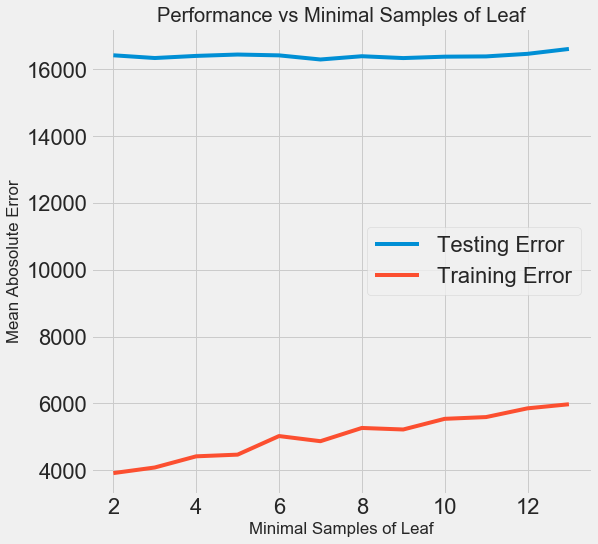

In [28]:
#Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_min_samples_leaf'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_min_samples_leaf'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Minimal Samples of Leaf'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Minimal Samples of Leaf');

## Evaluate Final Model on the Test Set

In [29]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=7, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

440 ms ± 4.35 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [31]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

2.78 s ± 40.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [32]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 17440.0853.
Final model performance on the test set:   MAE = 15759.1288.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


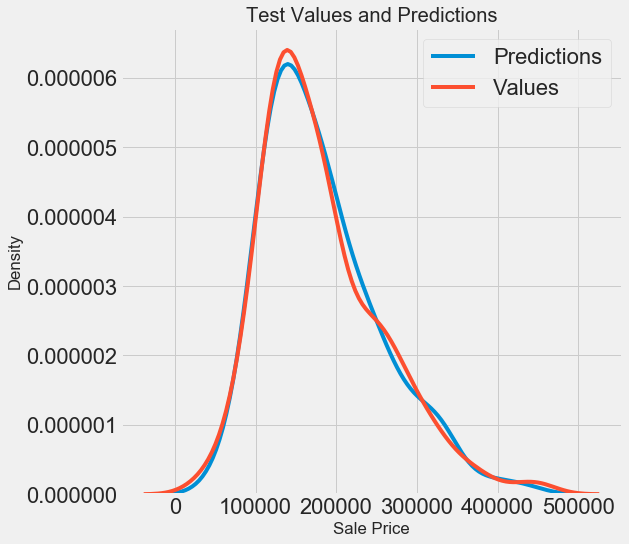

In [33]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Sale Price'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

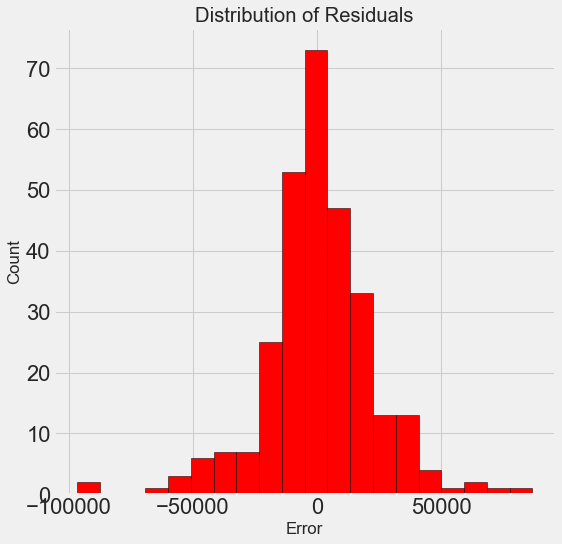

In [34]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');